<a href="https://colab.research.google.com/github/anmolaman20/DataScience_DailyLearning/blob/main/Kmeans_Demo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
student_data = pd.read_csv('student_clustering.csv')
student_data.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [8]:
student_data.shape

(200, 2)

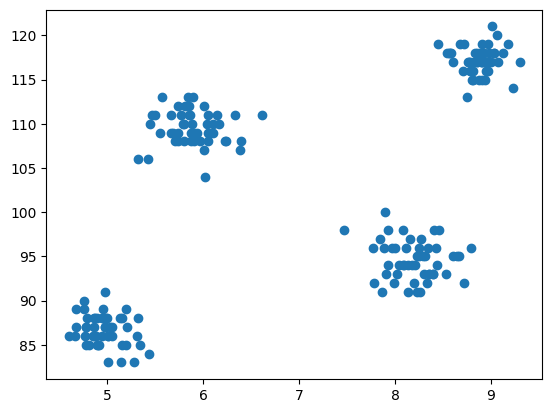

In [14]:
plt.scatter(student_data['cgpa'],student_data['iq'])

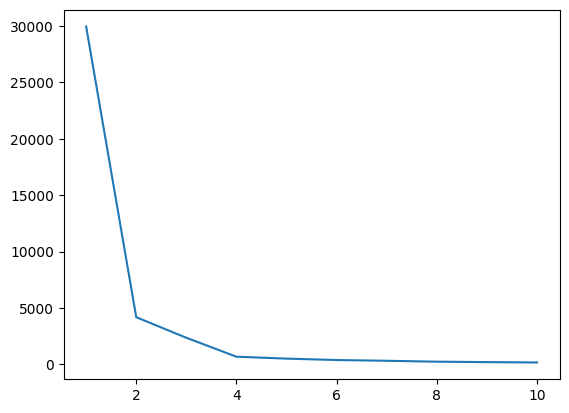

In [15]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(student_data)
  wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)


In [17]:
X = student_data.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)
y_means

array([2, 3, 0, 0, 3, 3, 0, 1, 3, 0, 2, 3, 0, 2, 3, 0, 3, 0, 3, 3, 0, 2,
       0, 2, 2, 0, 2, 1, 0, 3, 1, 3, 1, 3, 0, 0, 1, 3, 2, 3, 2, 0, 0, 2,
       1, 1, 0, 3, 1, 3, 2, 2, 1, 0, 1, 3, 3, 1, 3, 1, 3, 0, 0, 1, 2, 1,
       0, 2, 3, 0, 3, 1, 0, 2, 3, 1, 3, 1, 2, 0, 0, 1, 3, 2, 1, 2, 1, 3,
       1, 3, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 3, 2, 2, 1, 2, 2, 0, 2, 1, 1,
       0, 1, 3, 3, 0, 1, 0, 3, 1, 2, 2, 3, 0, 1, 0, 2, 0, 3, 2, 0, 0, 3,
       2, 2, 3, 1, 3, 2, 0, 0, 0, 2, 3, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 1,
       2, 0, 3, 1, 3, 0, 2, 1, 3, 0, 1, 2, 3, 2, 2, 1, 1, 3, 1, 2, 2, 0,
       1, 3, 2, 1, 1, 3, 3, 3, 0, 2, 0, 0, 1, 3, 0, 0, 2, 2, 0, 2, 1, 3,
       3, 1], dtype=int32)

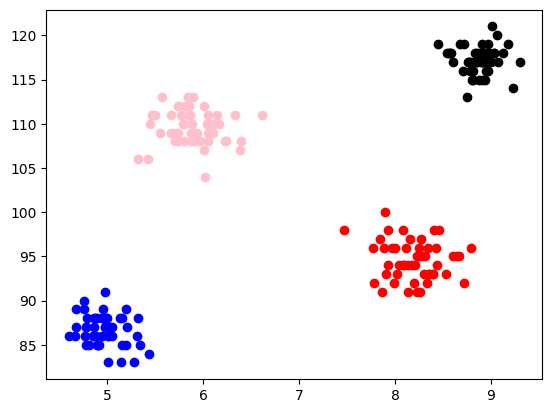

In [22]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='red')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='black')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='blue')
plt.scatter(X[y_means==3,0],X[y_means==3,1],color='pink')

In [26]:
from sklearn.datasets import make_blobs
centroid = [(-5,-5,-5),(5,5,5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]
X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroid,n_features=3,random_state=1)

In [28]:
df = pd.DataFrame()
df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]

In [34]:
import plotly.express as px
fig = px.scatter_3d(df,x='col1',y='col2',z='col3')
fig.show()

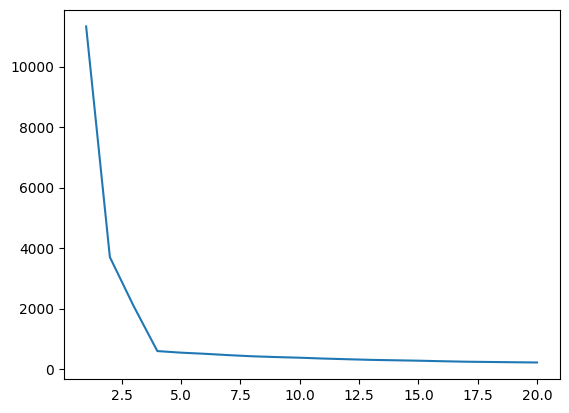

In [35]:
wcss = []
for i in range(1,21):
  km = KMeans(n_clusters=i)
  km.fit_predict(X)
  wcss.append(km.inertia_)

plt.plot(range(1,21),wcss)

In [37]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [38]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [39]:
px.scatter_3d(df,x='col1',y='col2',z='col3',color='label').show()